# Data Preparation

## Importing Important libraries

### List of all the versions of the libraries used:

python 3.11.5

pandas 2.0.3

numpy 1.24.3

nltk 3.8.1

matplotlib 3.7.2

contractions 0.1.73

scikit-learn 1.2.2

tabulate 0.8.10

gensim 4.3.0

tensorflown 2.15.0

In [1]:
!pip install contractions

In [3]:
import pandas as pd
import numpy as np
import nltk
nltk.download('wordnet')
nltk.download('punkt')
import re
import matplotlib.pyplot as plt
import contractions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

/var/folders/75/80lf4_793vn5xdm8_9jjr63h0000gn/T/ipykernel_7334/2486081064.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/namyashah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/namyashah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from nltk.corpus import stopwords

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/namyashah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.stem import WordNetLemmatizer

In [8]:
!pip install tabulate

In [9]:
from tabulate import tabulate

## Reading Data

In [10]:
path = '/Users/namyashah/Documents/USC Schooling/NLP/HW2/data/amazon_reviews_us_Office_Products_v1_00.tsv'

In [11]:
my_df = pd.read_csv(path,  sep='\t', header=0, on_bad_lines='skip')
my_df

/var/folders/75/80lf4_793vn5xdm8_9jjr63h0000gn/T/ipykernel_7334/1113296747.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  my_df = pd.read_csv(path,  sep='\t', header=0, on_bad_lines='skip')


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,43081963,R18RVCKGH1SSI9,B001BM2MAC,307809868,"Scotch Cushion Wrap 7961, 12 Inches x 100 Feet",Office Products,5,0.0,0.0,N,Y,Five Stars,Great product.,2015-08-31
1,US,10951564,R3L4L6LW1PUOFY,B00DZYEXPQ,75004341,"Dust-Off Compressed Gas Duster, Pack of 4",Office Products,5,0.0,1.0,N,Y,"Phffffffft, Phfffffft. Lots of air, and it's C...",What's to say about this commodity item except...,2015-08-31
2,US,21143145,R2J8AWXWTDX2TF,B00RTMUHDW,529689027,Amram Tagger Standard Tag Attaching Tagging Gu...,Office Products,5,0.0,0.0,N,Y,but I am sure I will like it.,"Haven't used yet, but I am sure I will like it.",2015-08-31
3,US,52782374,R1PR37BR7G3M6A,B00D7H8XB6,868449945,AmazonBasics 12-Sheet High-Security Micro-Cut ...,Office Products,1,2.0,3.0,N,Y,and the shredder was dirty and the bin was par...,Although this was labeled as &#34;new&#34; the...,2015-08-31
4,US,24045652,R3BDDDZMZBZDPU,B001XCWP34,33521401,"Derwent Colored Pencils, Inktense Ink Pencils,...",Office Products,4,0.0,0.0,N,Y,Four Stars,Gorgeous colors and easy to use,2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640249,US,53005790,RLI7EI10S7SN0,B00000DM9M,223408988,PalmOne III Leather Belt Clip Case,Office Products,4,26.0,26.0,N,N,Great value! A must if you hate to carry thing...,I can't live anymore whithout my Palm III. But...,1998-12-07
2640250,US,52188548,R1F3SRK9MHE6A3,B00000DM9M,223408988,PalmOne III Leather Belt Clip Case,Office Products,4,18.0,18.0,N,N,Attaches the Palm Pilot like an appendage,Although the Palm Pilot is thin and compact it...,1998-11-30
2640251,US,52090046,R23V0C4NRJL8EM,0807865001,307284585,Gods and Heroes of Ancient Greece,Office Products,4,9.0,16.0,N,N,"Excellent information, pictures and stories, I...",This book had a lot of great content without b...,1998-10-15
2640252,US,52503173,R13ZAE1ATEUC1T,1572313188,870359649,Microsoft EXCEL 97/ Visual Basic Step-by-Step ...,Office Products,5,0.0,0.0,N,N,class text,I am teaching a course in Excel and am using t...,1998-08-22


## Making Labels

In [12]:
review=my_df['review_body'].tolist()
# print(review)

In [228]:
rating=my_df['star_rating'].tolist()
#because these values have misread data of dates instead of ratings
rating[286835]=-1
rating[671556]=-1
rating[1523317]=-1
#print(rating)

In [14]:
ndf = pd.DataFrame({'reviews': review})
ndf['ratings'] = rating
sample = ndf.iloc[2:5]
sample.head()

,reviews,ratings
2,"Haven't used yet, but I am sure I will like it.",5
3,Although this was labeled as &#34;new&#34; the...,1
4,Gorgeous colors and easy to use,4


In [15]:
#making sure all values of ratings are numeric values
ndf["ratings"]=pd.to_numeric(ndf["ratings"])

In [16]:
#identifying that not all values of reviews are non string values
for a in ndf['reviews'].map(type):
  if a != str:
    print(a)

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class '

In [17]:
#making sure all values of reviews are string values
ndf['reviews'] = ndf['reviews'].map(str)

         reviews
ratings         
-1.0           3
 1.0      306979
 2.0      138384
 3.0      193691
 4.0      418371
 5.0     1582812


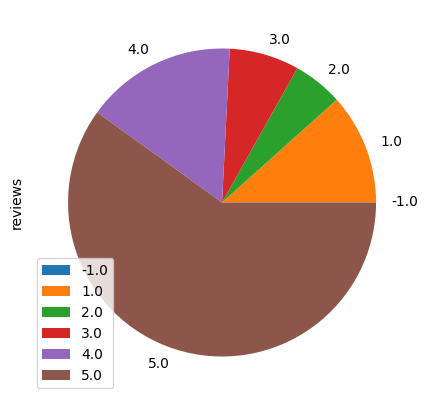

In [18]:
count = ndf.groupby(['ratings']).count()
print(count)
count.plot(kind='pie', subplots=True, figsize=(5,5))
plt.show()

In [19]:
def getTernaryLabel(ratings_Val):
  if ratings_Val > 3:
    return 0
  elif ratings_Val <= 2:
    return 1
  else:
    return 2

#adding new column for the binary labels
ndf['Labels'] = ndf['ratings'].apply(lambda x: getTernaryLabel(x))
ndf = ndf.drop('ratings', axis=1)
ndf

,reviews,Labels
0,Great product.,0
1,What's to say about this commodity item except...,0
2,"Haven't used yet, but I am sure I will like it.",0
3,Although this was labeled as &#34;new&#34; the...,1
4,Gorgeous colors and easy to use,0
...,...,...
2640249,I can't live anymore whithout my Palm III. But...,0
2640250,Although the Palm Pilot is thin and compact it...,0
2640251,This book had a lot of great content without b...,0
2640252,I am teaching a course in Excel and am using t...,0


        reviews
Labels         
0       2001183
1        445366
2        193705


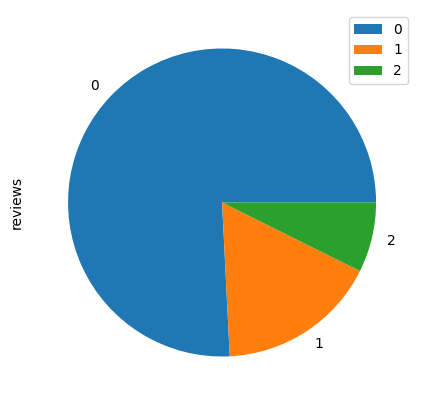

In [20]:
count2 = ndf.groupby(['Labels']).count()
print(count2)
count2.plot(kind='pie', subplots=True, figsize=(5,5))
plt.show()

In [21]:
ndf.shape

(2640254, 2)

## Making Samples of 50K and joining them to Binary and Ternary Dataset

In [22]:
#selecting all positive reviews
pos_rec = ndf.loc[ndf['Labels'] == 0]
print(pos_rec.shape)

#selecting 100,000 of those positive reviews at random
pos_rec = pos_rec.sample(n=50000)
print(pos_rec.shape)

(2001183, 2)
(50000, 2)


In [23]:
#selecting all negative reviews
neg_rec = ndf.loc[ndf['Labels'] == 1]
print(neg_rec.shape)

#selecting 100,000 of those negative reviews at random
neg_rec = neg_rec.sample(n=50000)
print(neg_rec.shape)

(445366, 2)
(50000, 2)


In [24]:
#selecting all neutral reviews
neu_rec = ndf.loc[ndf['Labels'] == 2]
print(neu_rec.shape)

#selecting 100,000 of those neutral reviews at random
neu_rec = neu_rec.sample(n=50000)
print(neu_rec.shape)

(193705, 2)
(50000, 2)


Here I am combining the positive review data and negative review data into Binary Dataframe

In [25]:
framesbin = [pos_rec, neg_rec]
binframes = pd.concat(framesbin)
binframes

,reviews,Labels
1512915,I like these Panasonic cordless phones. They h...,0
1851035,The three batteries arrived well packed and ea...,0
1420245,My kids use these all the time in their Art Cl...,0
1839567,I only replace/ install these as they run out ...,0
145903,Exactly what I needed for my music books.,0
...,...,...
2398822,I fear that I must agree fully with another re...,1
326453,They do not distribute the color evenly.Have t...,1
1795919,"VERY POOR WIFI RECEPTER, CONTACTED CANON AND W...",1
1851482,I called Olympus at 800-622-6372 and was told ...,1


Here I am combining the Positive, Negative and Neutral data into a Ternary Dataframe

In [26]:
framester = [pos_rec, neg_rec, neu_rec]
terframes = pd.concat(framester)
terframes

,reviews,Labels
1512915,I like these Panasonic cordless phones. They h...,0
1851035,The three batteries arrived well packed and ea...,0
1420245,My kids use these all the time in their Art Cl...,0
1839567,I only replace/ install these as they run out ...,0
145903,Exactly what I needed for my music books.,0
...,...,...
2042827,My students were easily bored with the game. ...,2
1661195,"I really wanted to like this, but the folder p...",2
71154,Bought it for a 50th anniversary slide show mo...,2
1199084,"Product as described, but I am not convinced t...",2


Here we shuffle the dataframes

In [27]:
binframes = binframes.sample(frac=1)
print(binframes.shape)
binframes

(100000, 2)


,reviews,Labels
1921057,This item came in a home made bubble wrap labe...,1
2032152,It works. I hope it continues working. Perha...,0
2590977,The software that comes with the printer does ...,1
1685277,It arrived on time and it came in a huge box. ...,0
29865,Works as well as Canon toner,0
...,...,...
1234437,The signage faded completely away after only a...,1
203972,Product was listed as usable on the MFC870DW. ...,1
2283458,I cleaned the heads 10 times and there are sti...,1
483295,The highlighters were not new or they were old...,1


In [28]:
terframes = terframes.sample(frac=1)
print(terframes.shape)
terframes

(150000, 2)


,reviews,Labels
1163606,Excellent pen! Actually this is the only pen ...,0
2069284,When you have a fresh set of batteries in this...,2
338411,These file folder labels are great. I use them...,0
37088,work's well ~ is Not the Heavy Duty All Steel...,2
752649,"great quality, great value!",0
...,...,...
2482466,I purchased this pen specifically for outdoor ...,1
1504746,We always use Scotch Heavy Duty Tape for packi...,2
2599944,I'm on a quest to find a cordless phone with d...,2
1751783,Just received my new printer and love the size...,2


# Data Cleaning and Pre-Processing

## Data Cleaning

In [29]:
avg_before_dc_bin = np.mean(binframes['reviews'].apply(lambda x: len(x.split())))

In [30]:
avg_before_dc_ter = np.mean(terframes['reviews'].apply(lambda x: len(x.split())))

In [31]:
#converting to lower case
binframes['reviews'] = binframes['reviews'].str.lower()

In [32]:
#converting to lower case
terframes['reviews'] = terframes['reviews'].str.lower()

In [33]:
#removing html

def clean_html(review_sent):
  review_sent = re.sub(r"<.*?>+","", review_sent)
  return " ".join(review_sent.split())

In [34]:
#removing url

def clean_url(review_sent):
  review_sent = re.sub(r"http[^\s]+","", review_sent)
  return " ".join(review_sent.split())

In [35]:
#fix contractions inspired from geeksforgeeks tutorial

def clean_contractions(review_sent):
  expanded_words = []
  for word in review_sent.split():
    expanded_words.append(contractions.fix(word))
  return " ".join(expanded_words)

In [36]:
#fix mentions

def clean_mentions(tweet):
    tweet = re.sub(r"@[A-Za-z0-9_]+","", tweet)
    return " ".join(tweet.split())

In [37]:
#removing non-alphabetic characters, numbers and extra spaces

binframes['reviews'] = binframes['reviews'].str.replace('\d+','')
terframes['reviews'] = terframes['reviews'].str.replace('\d+','')

non_alphabetic_chars = ['\\n','!','"','(',')','+',',','-','.','/',':',';','<','=','>','?','[','\\',']','^','`','{','|','}','~','#','“','”','―','→','←','™','’','•','‘','»','«','@','&','$','*','¥','%','÷']

def preprocess_reviews(review_vals, non_alphabetic_chars):
    processed_review = review_vals
    processed_review = clean_html(processed_review)
    processed_review = clean_url(processed_review)
    processed_review = clean_contractions(processed_review)
    processed_review = clean_mentions(processed_review)
    for char_wd in non_alphabetic_chars:
      processed_review = processed_review.replace(char_wd,'')
    processed_review = processed_review + " "
    return(" ".join(processed_review.split()))

In [38]:
binframes['reviews'] = binframes['reviews'].apply(lambda x: preprocess_reviews(x, non_alphabetic_chars))
binframes

,reviews,Labels
1921057,this item came in a home made bubble wrap labe...,1
2032152,it works i hope it continues working perhaps i...,0
2590977,the software that comes with the printer does ...,1
1685277,it arrived on time and it came in a huge box i...,0
29865,works as well as canon toner,0
...,...,...
1234437,the signage faded completely away after only a...,1
203972,product was listed as usable on the mfc870dw i...,1
2283458,i cleaned the heads 10 times and there are sti...,1
483295,the highlighters were not new or they were old...,1


In [39]:
terframes['reviews'] = terframes['reviews'].apply(lambda x: preprocess_reviews(x, non_alphabetic_chars))
terframes

,reviews,Labels
1163606,excellent pen actually this is the only pen i ...,0
2069284,when you have a fresh set of batteries in this...,2
338411,these file folder labels are great i use them ...,0
37088,work's well is not the heavy duty all steel or...,2
752649,great quality great value,0
...,...,...
2482466,i purchased this pen specifically for outdoor ...,1
1504746,we always use scotch heavy duty tape for packi...,2
2599944,i am on a quest to find a cordless phone with ...,2
1751783,just received my new printer and love the size...,2


In [40]:
avg_after_dc_bin = np.mean(binframes['reviews'].apply(lambda x: len(x.split())))

In [41]:
avg_after_dc_ter = np.mean(terframes['reviews'].apply(lambda x: len(x.split())))

In [42]:
print('Average length of Reviews before and after Data Cleaning for Binary Data:',avg_before_dc_bin,',',avg_after_dc_bin)
print('Average length of Reviews before and after Data Cleaning for Ternary Data:',avg_before_dc_ter,',',avg_after_dc_ter)

Average length of Reviews before and after Data Cleaning for Binary Data: 58.63282 , 58.67989
Average length of Reviews before and after Data Cleaning for Ternary Data: 61.25425333333333 , 61.32564


## Data Preprocessing

### Removing Stop Words

In [43]:
avg_before_pp_bin = np.mean(binframes['reviews'].apply(lambda x: len(x.split())))

In [44]:
avg_before_pp_ter = np.mean(terframes['reviews'].apply(lambda x: len(x.split())))

In [45]:
stops = set(stopwords.words('english'))
print(stops)

{'you', 'needn', "haven't", 'where', "wasn't", 'some', "don't", 'until', 'were', 'here', 'wouldn', 'm', 'below', 'aren', 'most', 'just', "you're", 'him', 'no', 'more', "doesn't", "mustn't", 'between', 's', 'hers', 'wasn', "that'll", 'other', 'its', 'above', 'them', 'such', 'off', 'so', 'after', 'who', 'those', 'from', 'being', 'her', 'as', 'it', 'for', 'any', 'over', 'that', 'did', 'your', 'by', 'further', 'too', 'he', 'have', 'against', 'or', 'through', 'i', 'ain', 'ours', 'my', 'how', 'am', 'of', 'an', 'mightn', 'under', 'll', "didn't", 'having', 'ourselves', 'can', 'than', 'y', 'doesn', 'into', 'when', 'hadn', "hadn't", 'been', 'don', "should've", 'with', 'then', 'same', 'are', 'couldn', 'they', "couldn't", 'should', 'mustn', 'doing', 'themselves', 'does', 'weren', 'do', 'own', 'but', 'all', 'ma', 'yours', 'haven', 'again', "mightn't", 'up', 'on', 'once', 'was', 'in', "it's", "hasn't", 'while', "shouldn't", 'shan', 'if', 'there', 'won', 'few', "weren't", "you'll", 'to', 'hasn', 'now

In [46]:
#remove stopwords

def clean_stopwords(review_sent):
  filtered_sentence = []
  for w in review_sent.split():
    if w not in stops:
        filtered_sentence.append(w)
  return " ".join(filtered_sentence)

In [47]:
binframes['reviews'] = binframes['reviews'].apply(lambda x: clean_stopwords(x))
binframes

,reviews,Labels
1921057,item came home made bubble wrap labeled new ou...,1
2032152,works hope continues working perhaps get disco...,0
2590977,software comes printer support newer versions ...,1
1685277,arrived time came huge box expecting big pictu...,0
29865,works well canon toner,0
...,...,...
1234437,signage faded completely away couple weeks,1
203972,product listed usable mfc870dw bought time bou...,1
2283458,cleaned heads 10 times still gaps printing goi...,1
483295,highlighters new old dried good buy,1


In [48]:
terframes['reviews'] = terframes['reviews'].apply(lambda x: clean_stopwords(x))
terframes

,reviews,Labels
1163606,excellent pen actually pen like use write anyt...,0
2069284,fresh set batteries nice strong beam unfortuna...,2
338411,file folder labels great use folders,0
37088,work's well heavy duty steel original stapler ...,2
752649,great quality great value,0
...,...,...
2482466,purchased pen specifically outdoor use package...,1
1504746,always use scotch heavy duty tape packing supe...,2
2599944,quest find cordless phone decent features exce...,2
1751783,received new printer love size functions probl...,2


### Perform Lemmatization

In [49]:
def lets_lemmatize(review_sent):
  lemmatizer = WordNetLemmatizer()
  lemmatized_sentence = []
  for word in nltk.word_tokenize(review_sent):
    word =lemmatizer.lemmatize(word)
    lemmatized_sentence.append(word)
  return " ".join(lemmatized_sentence)

In [50]:
binframes['reviews'] = binframes['reviews'].apply(lambda x: lets_lemmatize(x))
binframes

,reviews,Labels
1921057,item came home made bubble wrap labeled new ou...,1
2032152,work hope continues working perhaps get discou...,0
2590977,software come printer support newer version ma...,1
1685277,arrived time came huge box expecting big pictu...,0
29865,work well canon toner,0
...,...,...
1234437,signage faded completely away couple week,1
203972,product listed usable mfc870dw bought time bou...,1
2283458,cleaned head 10 time still gap printing going ...,1
483295,highlighter new old dried good buy,1


In [51]:
terframes['reviews'] = terframes['reviews'].apply(lambda x: lets_lemmatize(x))
terframes

,reviews,Labels
1163606,excellent pen actually pen like use write anyt...,0
2069284,fresh set battery nice strong beam unfortunate...,2
338411,file folder label great use folder,0
37088,work 's well heavy duty steel original stapler...,2
752649,great quality great value,0
...,...,...
2482466,purchased pen specifically outdoor use package...,1
1504746,always use scotch heavy duty tape packing supe...,2
2599944,quest find cordless phone decent feature excel...,2
1751783,received new printer love size function proble...,2


In [52]:
avg_after_pp_bin = np.mean(binframes['reviews'].apply(lambda x: len(x.split())))
avg_after_pp_ter = np.mean(terframes['reviews'].apply(lambda x: len(x.split())))
print('Average length of Reviews before and after Pre-Processing:',avg_before_pp_bin,',',avg_after_pp_bin)
print('Average length of Reviews before and after Pre-Processing:',avg_before_pp_ter,',',avg_after_pp_ter)

Average length of Reviews before and after Pre-Processing: 58.67989 , 29.20605
Average length of Reviews before and after Pre-Processing: 61.32564 , 30.324166666666667


# Word Embedding

## Word2Vec using Pre-trained Model

In [53]:
import tempfile
from gensim.models import KeyedVectors

/Users/namyashah/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [54]:
#importing gensim and pre-trained word2vec model
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [55]:
import tempfile

with tempfile.NamedTemporaryFile(prefix='gensim-model-', delete=False) as tmp:
    temporary_filepath = tmp.name
    wv.save(temporary_filepath)
    #
    # The model is now safely stored in the filepath.
    # You can copy it to other machines, share it with others, etc.
    #
    # To load a saved model:
    #
    new_model = KeyedVectors.load(temporary_filepath)

In [56]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [57]:
import time

In [58]:
#tokenizing the reviews into words
binframes['MyReviews'] = [word_tokenize(t) for t in binframes['reviews']]
binframes.head(5)

,reviews,Labels,MyReviews
1921057,item came home made bubble wrap labeled new ou...,1,"[item, came, home, made, bubble, wrap, labeled..."
2032152,work hope continues working perhaps get discou...,0,"[work, hope, continues, working, perhaps, get,..."
2590977,software come printer support newer version ma...,1,"[software, come, printer, support, newer, vers..."
1685277,arrived time came huge box expecting big pictu...,0,"[arrived, time, came, huge, box, expecting, bi..."
29865,work well canon toner,0,"[work, well, canon, toner]"


In [59]:
#Extracting Word Embeddings from the Pre-trained Model

def embeddingFun(sent):
    vectorsize = wv.vector_size
    PT_Embeddings = np.zeros(vectorsize)
    c=1
    
    for word in sent:
        if word in wv:
            c+=1
            PT_Embeddings+=wv[word]
    avg = PT_Embeddings/c
    return avg
        
binframes['gvectors']=binframes['MyReviews'].apply(embeddingFun)

In [60]:
#Example 1 to check semantic similarities of the generated vectors
print(wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1))

[('queen', 0.7118192911148071)]


In [61]:
#Example 2 to check semantic similarities of the generated vectors
print('The similarity score between excellent and outstanding is:', wv.similarity('excellent','outstanding'))

The similarity score between excellent and outstanding is: 0.5567486


## Custom Word2Vec Model

In [62]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import multiprocessing

In [63]:
cores = multiprocessing.cpu_count()

In [64]:
#making and saving our custom Word2Vec Model
start = time.time()
model = Word2Vec(sentences=binframes['MyReviews'], vector_size=300, window=11, min_count=10, workers=cores-1, sg=1, hs=1)
end = round(time.time()-start,2)
print("This process took",end,"seconds.")

This process took 85.48 seconds.


In [65]:
#corpus_iterable = MyReviews

In [66]:
#model.build_vocab(corpus_iterable=corpus_iterable, keep_raw_vocab=False)

In [67]:
model.save("word2vec.model")

In [68]:
model = Word2Vec.load("word2vec.model")

In [69]:
#model.train(corpus_iterable=corpus_iterable, total_examples=model.corpus_count, epochs=25)

In [70]:
#model.epochs

In [71]:
# Store just the words + their trained embeddings.
word_vectors = model.wv
word_vectors.save("word2vec.wordvectors")

In [72]:
# Load back with memory-mapping = read-only, shared across processes.
wv2 = KeyedVectors.load("word2vec.wordvectors", mmap='r')

In [73]:
#Extracting Word Embeddings from the Custom trained Model

def embeddingFun2(sent):
    vectorsize = wv2.vector_size
    CM_Embeddings = np.zeros(vectorsize)
    c=1
    
    for word in sent:
        if word in wv2:
            c+=1
            PT_Embeddings+=wv[word]
    avg = CM_Embeddings/c
    return avg
        
binframes['cvectors']=binframes['MyReviews'].apply(embeddingFun)

In [74]:
#Example 1 to check semantic similarities of the generated vectors
print(model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=5))

[('romney', 0.3914776146411896), ('men', 0.381064236164093), ('mitt', 0.3443523347377777), ('darling', 0.3400265872478485), ('manly', 0.33894944190979004)]


In [75]:
#Example 2 to check semantic similarities of the generated vectors
print('The similarity score between excellent and outstanding is:', model.wv.similarity('excellent','outstanding'))

The similarity score between excellent and outstanding is: 0.52947176


#### What do you conclude from comparing vectors generated by yourself and the pretrained model?

A. The vectors generated by the pre-trained model gives more accurate similar words and has a better similarity score compare to the custom model I created. This can mean that pre-trained model has a huge training set and hence it might have more context to say that King and Queen are semantically similar with the only difference of Man and Woman, while our pre-trained model is not as rich to understand that context. This also means that the word embeddings in the custom model is centric to the context of data we provied to the model.

#### Which of the Word2Vec models seems to encode semantic similarities between words better?

A. The Pre-trained Gensim Word2Vec Model seems to encode semantic similarities between words better than the Custom model I created.

# Running Models for Pre-trained Word2Vec, Custom Word2Vec and TF-IDF Feature Extraction

In [76]:
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [77]:
Accuracy_Table = [['TFIDF','Percepton','Binary'],['TFIDF','SVM','Binary'],['Avg Pre-trained W2V','Percepton','Binary'],['Avg Pre-trained W2V','SVM','Binary'],['Avg Custom W2V','Percepton','Binary'],['Avg Custom W2V','SVM','Binary'],['Avg Pre-trained W2V','FNN','Binary'],['Avg Custom W2V','FNN','Binary'],['Con Pre-trained W2V','FNN','Binary'],['Con Custom W2V','FNN','Binary'],['Avg Pre-trained W2V','FNN','Ternary'],['Avg Custom W2V','FNN','Ternary'],['Con Pre-trained W2V','FNN','Ternary'],['Con Custom W2V','FNN','Ternary'],['Avg Pre-trained W2V','CNN','Binary'],['Avg Custom W2V','CNN','Binary'],['Avg Pre-trained W2V','CNN','Ternary'],['Avg Custom W2V','CNN','Ternary']]


## Running Models for TF-IDF Feature Extraxtion

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [79]:
tf_idf_feature_extracter = TfidfVectorizer()
Rev_tfidf = tf_idf_feature_extracter.fit_transform(binframes['reviews'])
#print(Rev_tfidf)

In [80]:
# split the data into 80-20 train-test
x_train, x_test, y_train, y_test = train_test_split(Rev_tfidf, binframes['Labels'], test_size=0.2, random_state = 20)

### Percepton Model

In [81]:
perceptron_model_tfidf = Perceptron()
perceptron_model_tfidf.fit(x_train, y_train)

Perceptron()

In [82]:
y_pred_perceptron_test = perceptron_model_tfidf.predict(x_test)

In [83]:
accuracy_test_perceptron = accuracy_score(y_test, y_pred_perceptron_test)
print('Perceptron Test Metrics: Accuracy = ', accuracy_test_perceptron)

Perceptron Test Metrics: Accuracy =  0.84775


In [84]:
Accuracy_Table[0].append(accuracy_test_perceptron)

### SVM Model

In [85]:
svm_model_tfidf = LinearSVC()
svm_model_tfidf.fit(x_train, y_train)

/Users/namyashah/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [86]:
y_pred_svm_test = svm_model_tfidf.predict(x_test)

In [87]:
accuracy_test_svm = accuracy_score(y_test, y_pred_svm_test)
print('SVM Test Metrics: Accuracy = ', accuracy_test_svm)

SVM Test Metrics: Accuracy =  0.88845


In [88]:
Accuracy_Table[1].append(accuracy_test_svm)

## Running Models for Pre-trained Word2Vec Feature Extraction

In [89]:
# split the data into 80-20 train-test
x_train, x_test, y_train, y_test = train_test_split(binframes['gvectors'], binframes['Labels'], test_size=0.2, random_state = 20)

### Percepton Model

In [90]:
perceptron_model = Perceptron()
perceptron_model.fit(x_train.to_list(), y_train.to_list())

Perceptron()

In [91]:
y_pred_perceptron_test = perceptron_model.predict(x_test.to_list())

In [92]:
accuracy_test_perceptron = accuracy_score(y_test, y_pred_perceptron_test)
print('Perceptron Test Metrics: Accuracy = ', accuracy_test_perceptron)

Perceptron Test Metrics: Accuracy =  0.7971


In [93]:
Accuracy_Table[2].append(accuracy_test_perceptron)

### SVM Model

In [94]:
svm_model_tfidf = LinearSVC()
svm_model_tfidf.fit(x_train.to_list(), y_train.to_list())

/Users/namyashah/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [95]:
y_pred_svm_test = svm_model_tfidf.predict(x_test.to_list())

In [96]:
accuracy_test_svm = accuracy_score(y_test, y_pred_svm_test)
print('SVM Test Metrics: Accuracy = ', accuracy_test_svm)

SVM Test Metrics: Accuracy =  0.8487


In [97]:
Accuracy_Table[3].append(accuracy_test_svm)

## Running Models for Custom Word2Vec Feature Extraction

In [98]:
# split the data into 80-20 train-test
x_train, x_test, y_train, y_test = train_test_split(binframes['cvectors'], binframes['Labels'], test_size=0.2, random_state = 20)

### Percepton Model

In [99]:
perceptron_model = Perceptron()
perceptron_model.fit(x_train.to_list(), y_train.to_list())

Perceptron()

In [100]:
y_pred_perceptron_test = perceptron_model.predict(x_test.to_list())

In [101]:
accuracy_test_perceptron = accuracy_score(y_test, y_pred_perceptron_test)
print('Perceptron Train Metrics: Accuracy = ', accuracy_test_perceptron)

Perceptron Train Metrics: Accuracy =  0.7971


In [102]:
Accuracy_Table[4].append(accuracy_test_perceptron)

### SVM Model

In [103]:
svm_model_tfidf = LinearSVC()
svm_model_tfidf.fit(x_train.to_list(), y_train.to_list())

/Users/namyashah/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [104]:
y_pred_svm_test = svm_model_tfidf.predict(x_test.to_list())

In [105]:
accuracy_test_svm = accuracy_score(y_test, y_pred_svm_test)
print('SVM Test Metrics: Accuracy = ', accuracy_test_svm)

SVM Test Metrics: Accuracy =  0.8487


In [106]:
Accuracy_Table[5].append(accuracy_test_svm)

### What do you conclude from comparing performances for the models trained using the three different feature types (TF-IDF, pretrained Word2Vec, your trained Word2Vec)?

A. From the results, it is apparent that the TF-IDF feature extraction gives better accuracy score compares to the Pre-trained Gensim Word2vec and my custom Word2Vec feature extracter. This could mean that TF-IDF features fit better with the SVM and Percepton model in comparison to the features from the other two models. This could also mean that TF-IDF is better at extracting features from this specific reviews dataset in comparison to the other two. It is also observed that SVM model gives a better accuracy score than the Percepton model, which can suggest that the SVM model does the job of classification for this specific reviews dataset better than the Percepton model. All this being said, one thing to be kept in mind is that these performances can have varied answers if we change parameters such as sample size of the data set, hyperparameter in the custom Word2Vec model or change the dataset in itself. 

# Feedforward Neural Networks

In [107]:
#!pip install tensorflow

In [108]:
import numpy as np
import tensorflow as tf

## FNN for Binary Classification

### Using Features extracted from Pre-trained Avg Word2Vec Model

Here the Feedforward Neural Network is used for the Binary Classification, where the feature extracter is the Pre-trained Gensim Word2Vec model and the vector for a review are the average of the vectors for each word in the review.

In [109]:
# split the data into 80-20 train-test
x_train, x_test, y_train, y_test = train_test_split(binframes['gvectors'], binframes['Labels'], test_size=0.2, random_state = 20)

In [110]:
# Converting NumPy arrays to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(x_train.to_list(), dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.int32)
X_test_tf = tf.convert_to_tensor(x_test.to_list(), dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [111]:
neural_network_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation='relu', input_shape=(300,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [112]:
# Compiling the neural network
neural_network_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [114]:
# Training the neural network
history1 = neural_network_1.fit(X_train_tf, y_train_tf, epochs=100, batch_size=32)

Epoch 1/100
2500/2500 [==============================] - 1s 432us/step - loss: 0.3755 - accuracy: 0.8339
Epoch 2/100
2500/2500 [==============================] - 1s 423us/step - loss: 0.3382 - accuracy: 0.8534
Epoch 3/100
2500/2500 [==============================] - 1s 457us/step - loss: 0.3253 - accuracy: 0.8598
Epoch 4/100
2500/2500 [==============================] - 1s 439us/step - loss: 0.3162 - accuracy: 0.8642
Epoch 5/100
2500/2500 [==============================] - 1s 452us/step - loss: 0.3078 - accuracy: 0.8687
Epoch 6/100
2500/2500 [==============================] - 1s 417us/step - loss: 0.3005 - accuracy: 0.8723
Epoch 7/100
2500/2500 [==============================] - 1s 411us/step - loss: 0.2947 - accuracy: 0.8751
Epoch 8/100
2500/2500 [==============================] - 1s 409us/step - loss: 0.2884 - accuracy: 0.8778
Epoch 9/100
2500/2500 [==============================] - 1s 409us/step - loss: 0.2835 - accuracy: 0.8800
Epoch 10/100
2500/2500 [==============================]

In [115]:
# Evaluating the neural network on the test set
test_loss, test_acc = neural_network_1.evaluate(X_test_tf, y_test_tf)
print('Test accuracy:', test_acc)

625/625 [==============================] - 0s 297us/step - loss: 0.5328 - accuracy: 0.8498
Test accuracy: 0.8498499989509583


In [116]:
Accuracy_Table[6].append(test_acc)

### Using Features extracted from Custom Avg Word2Vec Model

Here the Feedforward Neural Network is used for the Binary Classification, where the feature extracter is the Custom Word2Vec model and the vector for a review are the average of the vectors for each word in the review.

In [117]:
# split the data into 80-20 train-test
x_train, x_test, y_train, y_test = train_test_split(binframes['cvectors'], binframes['Labels'], test_size=0.2, random_state = 20)

In [118]:
# Converting NumPy arrays to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(x_train.to_list(), dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.int32)
X_test_tf = tf.convert_to_tensor(x_test.to_list(), dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [119]:
neural_network_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation='relu', input_shape=(300,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [120]:
# Compiling the neural network
neural_network_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [121]:
# Training the neural network
history2 = neural_network_2.fit(X_train_tf, y_train_tf, epochs=100, batch_size=32)

Epoch 1/100
  87/2500 [>.............................] - ETA: 1s - loss: 0.6104 - accuracy: 0.7432  

2500/2500 [==============================] - 1s 403us/step - loss: 0.3771 - accuracy: 0.8369
Epoch 2/100
2500/2500 [==============================] - 1s 393us/step - loss: 0.3375 - accuracy: 0.8539
Epoch 3/100
2500/2500 [==============================] - 1s 400us/step - loss: 0.3233 - accuracy: 0.8623
Epoch 4/100
2500/2500 [==============================] - 1s 425us/step - loss: 0.3127 - accuracy: 0.8657
Epoch 5/100
2500/2500 [==============================] - 1s 415us/step - loss: 0.3048 - accuracy: 0.8703
Epoch 6/100
2500/2500 [==============================] - 1s 424us/step - loss: 0.2984 - accuracy: 0.8735
Epoch 7/100
2500/2500 [==============================] - 1s 405us/step - loss: 0.2929 - accuracy: 0.8761
Epoch 8/100
2500/2500 [==============================] - 1s 466us/step - loss: 0.2866 - accuracy: 0.8794
Epoch 9/100
2500/2500 [==============================] - 1s 435us/step - loss: 0.2818 - accuracy: 0.8805
Epoch 10/100
2500/2500 [==============================] - 1s 406us/

In [122]:
# Evaluating the neural network on the test set
test_loss, test_acc = neural_network_2.evaluate(X_test_tf, y_test_tf)
print('Test accuracy:', test_acc)

625/625 [==============================] - 0s 300us/step - loss: 0.5405 - accuracy: 0.8510
Test accuracy: 0.8510000109672546


In [123]:
Accuracy_Table[7].append(test_acc)

### Using Pre-trained Word2Vec for Concatenanting Extracted Features in Binary Data Set 

Here we are preparing the concatenated vectors

In [124]:
binframes.head(5)

,reviews,Labels,MyReviews,gvectors,cvectors
1921057,item came home made bubble wrap labeled new ou...,1,"[item, came, home, made, bubble, wrap, labeled...","[0.027547836303710938, 0.09846019744873047, 0....","[0.027547836303710938, 0.09846019744873047, 0...."
2032152,work hope continues working perhaps get discou...,0,"[work, hope, continues, working, perhaps, get,...","[0.05845424107142857, 0.016178676060267856, -0...","[0.05845424107142857, 0.016178676060267856, -0..."
2590977,software come printer support newer version ma...,1,"[software, come, printer, support, newer, vers...","[0.06760212912488339, -0.03568415855293843, -0...","[0.06760212912488339, -0.03568415855293843, -0..."
1685277,arrived time came huge box expecting big pictu...,0,"[arrived, time, came, huge, box, expecting, bi...","[0.03836669921875, 0.05717875162760417, -0.008...","[0.03836669921875, 0.05717875162760417, -0.008..."
29865,work well canon toner,0,"[work, well, canon, toner]","[0.0806640625, 0.07841796875, -0.0003662109375...","[0.0806640625, 0.07841796875, -0.0003662109375..."


In [125]:
new_model = KeyedVectors.load(temporary_filepath)

The padding function does the job of padding the concatenated vectors in a way that each vector has a fixed length of 10 vectors, each containing 300 values.

In [126]:
def padding(list_of_lists, pad_value, desired_length, max_num_lists=10):
    padded_list = []
    
    # Iterate over the original list, keeping the original content unchanged
    for sublist in list_of_lists[:max_num_lists]:
        padded_sublist = sublist[:]  # Create a copy of the sublist
        
        # Pad or truncate the copied sublist
        if len(sublist) < desired_length:
            padded_sublist.extend([pad_value] * (desired_length - len(sublist)))
        else:
            padded_sublist = padded_sublist[:desired_length]  # truncate if longer
        
        padded_list.append(padded_sublist)
    
    # Add empty lists if there are fewer than max_num_lists lists
    while len(padded_list) < max_num_lists:
        padded_list.append([pad_value] * desired_length)
    
    return padded_list

In [127]:
#Extracting Word Embeddings from the Pre-trained Model

def embeddingFun(sent):
    vectorsize = new_model.vector_size
    PT_Embeddings_temp = np.zeros(vectorsize)
    PT_Embeddings = []
    c=0
    pad_value=0
    desired_length=300
    
    for word in sent:
        if word in new_model:
            PT_Embeddings_temp=wv[word]
        if c in range(0,10):
            PT_Embeddings.append(PT_Embeddings_temp)
            c+=1
    
    PT_Embeddings = padding(PT_Embeddings, pad_value, desired_length)
    return np.array(PT_Embeddings)
        
binframes['congvectors']=binframes['MyReviews'].apply(embeddingFun)
binframes.head(5)
#temp =pd.DataFrame()
#temp['congvectors'] = binframes['MyReviews'].apply(embeddingFun)
#temp.head(10)

,reviews,Labels,MyReviews,gvectors,cvectors,congvectors
1921057,item came home made bubble wrap labeled new ou...,1,"[item, came, home, made, bubble, wrap, labeled...","[0.027547836303710938, 0.09846019744873047, 0....","[0.027547836303710938, 0.09846019744873047, 0....","[[0.024291992, 0.010803223, -0.107421875, 0.30..."
2032152,work hope continues working perhaps get discou...,0,"[work, hope, continues, working, perhaps, get,...","[0.05845424107142857, 0.016178676060267856, -0...","[0.05845424107142857, 0.016178676060267856, -0...","[[-0.075683594, 0.033691406, -0.064941406, 0.1..."
2590977,software come printer support newer version ma...,1,"[software, come, printer, support, newer, vers...","[0.06760212912488339, -0.03568415855293843, -0...","[0.06760212912488339, -0.03568415855293843, -0...","[[0.20410156, -0.30078125, -0.013916016, 0.119..."
1685277,arrived time came huge box expecting big pictu...,0,"[arrived, time, came, huge, box, expecting, bi...","[0.03836669921875, 0.05717875162760417, -0.008...","[0.03836669921875, 0.05717875162760417, -0.008...","[[0.15429688, 0.26757812, 0.09326172, -0.15234..."
29865,work well canon toner,0,"[work, well, canon, toner]","[0.0806640625, 0.07841796875, -0.0003662109375...","[0.0806640625, 0.07841796875, -0.0003662109375...","[[-0.07568359375, 0.03369140625, -0.0649414062..."


In [128]:
'''
#just checking vectorizing was done correctly
count0 =0
count1 =0
count2 =0
count3 =0
for i in range(100000):
    if len(temp['congvectors'].iloc[i]) >10:
        count0+=1
    elif len(temp['congvectors'].iloc[i]) == 10:
        count1+=1
    elif len(temp['congvectors'].iloc[i]) in range(5,10):
        count2+=1
    else:
        count3+=1
print("Vectors of size greater than 10: ",count0)        
print("Vectors of size 10: ",count1)
print("Vectors of size between 5 and 10: ",count2)
print("Vectors of size between 0 and 5: ",count3)
print("Sentences vectorized",(count0+count1+count2+count3))
'''

'\n#just checking vectorizing was done correctly\ncount0 =0\ncount1 =0\ncount2 =0\ncount3 =0\nfor i in range(100000):\n    if len(temp[\'congvectors\'].iloc[i]) >10:\n        count0+=1\n    elif len(temp[\'congvectors\'].iloc[i]) == 10:\n        count1+=1\n    elif len(temp[\'congvectors\'].iloc[i]) in range(5,10):\n        count2+=1\n    else:\n        count3+=1\nprint("Vectors of size greater than 10: ",count0)        \nprint("Vectors of size 10: ",count1)\nprint("Vectors of size between 5 and 10: ",count2)\nprint("Vectors of size between 0 and 5: ",count3)\nprint("Sentences vectorized",(count0+count1+count2+count3))\n'

In [129]:
#print(temp['congvectors'].iloc[2000].shape)

### Using Custom Word2Vec for Concatenanting Extracted Features in Binary Data Set 

Here we are preparing the concatenated vectors

In [130]:
#loading the word vectors from the previously custom trained model
wvcon = KeyedVectors.load("word2vec.wordvectors", mmap='r')

In [131]:
#Extracting Word Embeddings from the Pre-trained Model

def embeddingFun(sent):
    vectorsize = new_model.vector_size
    CM_Embeddings_temp = np.zeros(vectorsize)
    CM_Embeddings = []
    c=0
    pad_value=0
    desired_length=300
    
    for word in sent:
        if word in wvcon:
            CM_Embeddings_temp=wvcon[word]
        if c in range(0,10):
            CM_Embeddings.append(CM_Embeddings_temp)
            c+=1
    
    CM_Embeddings = padding(CM_Embeddings, pad_value, desired_length)
    return np.array(CM_Embeddings)
        
binframes['concvectors']=binframes['MyReviews'].apply(embeddingFun)
binframes.head(5)

,reviews,Labels,MyReviews,gvectors,cvectors,congvectors,concvectors
1921057,item came home made bubble wrap labeled new ou...,1,"[item, came, home, made, bubble, wrap, labeled...","[0.027547836303710938, 0.09846019744873047, 0....","[0.027547836303710938, 0.09846019744873047, 0....","[[0.024291992, 0.010803223, -0.107421875, 0.30...","[[0.035866924, -0.01820376, 0.17473365, 0.0287..."
2032152,work hope continues working perhaps get discou...,0,"[work, hope, continues, working, perhaps, get,...","[0.05845424107142857, 0.016178676060267856, -0...","[0.05845424107142857, 0.016178676060267856, -0...","[[-0.075683594, 0.033691406, -0.064941406, 0.1...","[[0.04482966, -0.032019116, 0.06074907, 0.0353..."
2590977,software come printer support newer version ma...,1,"[software, come, printer, support, newer, vers...","[0.06760212912488339, -0.03568415855293843, -0...","[0.06760212912488339, -0.03568415855293843, -0...","[[0.20410156, -0.30078125, -0.013916016, 0.119...","[[0.047153026, -0.038383402, -0.02039575, -0.1..."
1685277,arrived time came huge box expecting big pictu...,0,"[arrived, time, came, huge, box, expecting, bi...","[0.03836669921875, 0.05717875162760417, -0.008...","[0.03836669921875, 0.05717875162760417, -0.008...","[[0.15429688, 0.26757812, 0.09326172, -0.15234...","[[0.0069977418, -0.1542149, 0.39981222, 0.0632..."
29865,work well canon toner,0,"[work, well, canon, toner]","[0.0806640625, 0.07841796875, -0.0003662109375...","[0.0806640625, 0.07841796875, -0.0003662109375...","[[-0.07568359375, 0.03369140625, -0.0649414062...","[[0.044829659163951874, -0.03201911598443985, ..."


### FNN Using Features extracted from Pre-trained Concatenated Word2Vec Model for Binary Data

Here the Feedforward Neural Network is used for the Binary Classification, where the feature extracter is the Pre-trained Gensim Word2Vec model and the vector for a review are the concatenation of the vectors for each word in the review.

In [136]:
# split the data into 80-20 train-test
x_train, x_test, y_train, y_test = train_test_split(binframes['congvectors'], binframes['Labels'], test_size=0.2, random_state = 20)

In [137]:
# Converting NumPy arrays to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(x_train.to_list(), dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.int32)
X_test_tf = tf.convert_to_tensor(x_test.to_list(), dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [138]:
# Flattening the tensor into a single feature vector
x_train_tf_flat = tf.reshape(X_train_tf, (X_train_tf.shape[0],-1))
X_test_tf_flat = tf.reshape(X_test_tf, (X_test_tf.shape[0],-1))

In [139]:
neural_network_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation='relu', input_shape=((3000),)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [140]:
# Compiling the neural network
neural_network_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [141]:
# Training the neural network
history3 = neural_network_3.fit(x_train_tf_flat, y_train_tf, epochs=100, batch_size=32)

Epoch 1/100
2500/2500 [==============================] - 2s 653us/step - loss: 0.4609 - accuracy: 0.7789
Epoch 2/100
2500/2500 [==============================] - 2s 622us/step - loss: 0.3993 - accuracy: 0.8150
Epoch 3/100
2500/2500 [==============================] - 1s 597us/step - loss: 0.3422 - accuracy: 0.8475
Epoch 4/100
2500/2500 [==============================] - 1s 590us/step - loss: 0.2763 - accuracy: 0.8829
Epoch 5/100
2500/2500 [==============================] - 2s 625us/step - loss: 0.2119 - accuracy: 0.9147
Epoch 6/100
2500/2500 [==============================] - 2s 619us/step - loss: 0.1612 - accuracy: 0.9380
Epoch 7/100
2500/2500 [==============================] - 2s 819us/step - loss: 0.1235 - accuracy: 0.9537
Epoch 8/100
2500/2500 [==============================] - 2s 929us/step - loss: 0.0999 - accuracy: 0.9626
Epoch 9/100
2500/2500 [==============================] - 2s 720us/step - loss: 0.0855 - accuracy: 0.9686
Epoch 10/100
2500/2500 [==============================]

In [142]:
# Evaluating the neural network on the test set
test_loss, test_acc = neural_network_3.evaluate(X_test_tf_flat, y_test_tf)
print('Test accuracy:', test_acc)

625/625 [==============================] - 0s 517us/step - loss: 3.0111 - accuracy: 0.7652
Test accuracy: 0.7652000188827515


In [143]:
Accuracy_Table[8].append(test_acc)

### FNN Using Features extracted from Custom Concatenated Word2Vec Model For Binary Data

Here the Feedforward Neural Network is used for the Binary Classification, where the feature extracter is the Custom Word2Vec model and the vector for a review are the concatenation of the vectors for each word in the review.

In [144]:
# split the data into 80-20 train-test
x_train, x_test, y_train, y_test = train_test_split(binframes['concvectors'], binframes['Labels'], test_size=0.2, random_state = 20)

In [145]:
# Converting NumPy arrays to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(x_train.to_list(), dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.int32)
X_test_tf = tf.convert_to_tensor(x_test.to_list(), dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [146]:
# Flattening the tensor into a single feature vector
x_train_tf_flat = tf.reshape(X_train_tf, (X_train_tf.shape[0],-1))
X_test_tf_flat = tf.reshape(X_test_tf, (X_test_tf.shape[0],-1))

In [147]:
neural_network_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation='relu', input_shape=((3000),)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [148]:
# Compiling the neural network
neural_network_4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [149]:
# Training the neural network
history4 = neural_network_4.fit(x_train_tf_flat, y_train_tf, epochs=100, batch_size=32)

Epoch 1/100
  50/2500 [..............................] - ETA: 2s - loss: 0.5508 - accuracy: 0.7300  

2500/2500 [==============================] - 2s 775us/step - loss: 0.4087 - accuracy: 0.8116
Epoch 2/100
2500/2500 [==============================] - 2s 617us/step - loss: 0.3618 - accuracy: 0.8364
Epoch 3/100
2500/2500 [==============================] - 2s 610us/step - loss: 0.3208 - accuracy: 0.8581
Epoch 4/100
2500/2500 [==============================] - 1s 596us/step - loss: 0.2655 - accuracy: 0.8888
Epoch 5/100
2500/2500 [==============================] - 2s 664us/step - loss: 0.2055 - accuracy: 0.9185
Epoch 6/100
2500/2500 [==============================] - 2s 683us/step - loss: 0.1514 - accuracy: 0.9430
Epoch 7/100
2500/2500 [==============================] - 2s 612us/step - loss: 0.1124 - accuracy: 0.9587
Epoch 8/100
2500/2500 [==============================] - 1s 595us/step - loss: 0.0861 - accuracy: 0.9692
Epoch 9/100
2500/2500 [==============================] - 2s 603us/step - loss: 0.0688 - accuracy: 0.9756
Epoch 10/100
2500/2500 [==============================] - 2s 602us/

In [150]:
# Evaluating the neural network on the test set
test_loss, test_acc = neural_network_4.evaluate(X_test_tf_flat, y_test_tf)
print('Test accuracy:', test_acc)

625/625 [==============================] - 0s 398us/step - loss: 3.0079 - accuracy: 0.7911
Test accuracy: 0.7910500168800354


In [151]:
Accuracy_Table[9].append(test_acc)

## FNN for Ternary Classification

### Using Pre-trained Avg Word2Vec for Feature Extraction in Ternary DataSet

Here we are performing the Pre-trained Gensim Word2Vec feature extraction for Ternary Data

In [152]:
#tokenizing the reviews into words
terframes['MyReviews'] = [word_tokenize(t) for t in terframes['reviews']]
terframes.head(5)

,reviews,Labels,MyReviews
1163606,excellent pen actually pen like use write anyt...,0,"[excellent, pen, actually, pen, like, use, wri..."
2069284,fresh set battery nice strong beam unfortunate...,2,"[fresh, set, battery, nice, strong, beam, unfo..."
338411,file folder label great use folder,0,"[file, folder, label, great, use, folder]"
37088,work 's well heavy duty steel original stapler...,2,"[work, 's, well, heavy, duty, steel, original,..."
752649,great quality great value,0,"[great, quality, great, value]"


In [153]:
new_model = KeyedVectors.load(temporary_filepath)

In [154]:
#Extracting Word Embeddings from the Pre-trained Model

def embeddingFun(sent):
    vectorsize = new_model.vector_size
    PT_Embeddings = np.zeros(vectorsize)
    c=1
    
    for word in sent:
        if word in new_model:
            c+=1
            PT_Embeddings+=wv[word]
    avg = PT_Embeddings/c
    return avg
        
terframes['gvectors']=terframes['MyReviews'].apply(embeddingFun)

### Using Custom Avg Word2Vec for Feature Extraction in Ternary DataSet

Here we are performing the Custom Word2Vec feature extraction for Ternary Data

In [155]:
#making and saving our custom Word2Vec Model
start = time.time()
model = Word2Vec(sentences=terframes['MyReviews'], vector_size=300, window=11, min_count=10, workers=cores-1, sg=1, hs=1)
end = round(time.time()-start,2)
print("This process took",end,"seconds.")

This process took 158.33 seconds.


In [156]:
model.save("word2vecTer.model")

In [157]:
model = Word2Vec.load("word2vecTer.model")

In [158]:
word_vectors = model.wv
word_vectors.save("word2vecTer.wordvectors")

In [159]:
# Load back with memory-mapping = read-only, shared across processes.
wv2 = KeyedVectors.load("word2vecTer.wordvectors", mmap='r')

In [160]:
#Extracting Word Embeddings from the Pre-trained Model

def embeddingFun2(sent):
    vectorsize = wv2.vector_size
    CM_Embeddings = np.zeros(vectorsize)
    c=1
    
    for word in sent:
        if word in wv2:
            c+=1
            PT_Embeddings+=wv[word]
    avg = CM_Embeddings/c
    return avg
        
terframes['cvectors']=terframes['MyReviews'].apply(embeddingFun)

In [161]:
terframes.head(5)

,reviews,Labels,MyReviews,gvectors,cvectors
1163606,excellent pen actually pen like use write anyt...,0,"[excellent, pen, actually, pen, like, use, wri...","[0.013108995225694444, -0.015750461154513888, ...","[0.013108995225694444, -0.015750461154513888, ..."
2069284,fresh set battery nice strong beam unfortunate...,2,"[fresh, set, battery, nice, strong, beam, unfo...","[0.035248976487379804, 0.09482046274038461, 0....","[0.035248976487379804, 0.09482046274038461, 0...."
338411,file folder label great use folder,0,"[file, folder, label, great, use, folder]","[0.11321149553571429, 0.029767717633928572, -0...","[0.11321149553571429, 0.029767717633928572, -0..."
37088,work 's well heavy duty steel original stapler...,2,"[work, 's, well, heavy, duty, steel, original,...","[0.07191051136363637, 0.07883522727272728, -0....","[0.07191051136363637, 0.07883522727272728, -0...."
752649,great quality great value,0,"[great, quality, great, value]","[-0.00732421875, 0.141259765625, 0.03442382812...","[-0.00732421875, 0.141259765625, 0.03442382812..."


### Using Pre-trained Word2Vec for Concatenanting Extracted Features in Ternary Data Set 

Here we are preparing the concatenated vectors

In [162]:
terframes.head(5)

,reviews,Labels,MyReviews,gvectors,cvectors
1163606,excellent pen actually pen like use write anyt...,0,"[excellent, pen, actually, pen, like, use, wri...","[0.013108995225694444, -0.015750461154513888, ...","[0.013108995225694444, -0.015750461154513888, ..."
2069284,fresh set battery nice strong beam unfortunate...,2,"[fresh, set, battery, nice, strong, beam, unfo...","[0.035248976487379804, 0.09482046274038461, 0....","[0.035248976487379804, 0.09482046274038461, 0...."
338411,file folder label great use folder,0,"[file, folder, label, great, use, folder]","[0.11321149553571429, 0.029767717633928572, -0...","[0.11321149553571429, 0.029767717633928572, -0..."
37088,work 's well heavy duty steel original stapler...,2,"[work, 's, well, heavy, duty, steel, original,...","[0.07191051136363637, 0.07883522727272728, -0....","[0.07191051136363637, 0.07883522727272728, -0...."
752649,great quality great value,0,"[great, quality, great, value]","[-0.00732421875, 0.141259765625, 0.03442382812...","[-0.00732421875, 0.141259765625, 0.03442382812..."


In [163]:
new_model = KeyedVectors.load(temporary_filepath)

In [164]:
#Extracting Word Embeddings from the Pre-trained Model

def embeddingFun(sent):
    vectorsize = new_model.vector_size
    PT_Embeddings_temp = np.zeros(vectorsize)
    PT_Embeddings = []
    c=0
    pad_value=0
    desired_length=300
    
    for word in sent:
        if word in new_model:
            PT_Embeddings_temp=wv[word]
        if c in range(0,10):
            PT_Embeddings.append(PT_Embeddings_temp)
            c+=1
    
    PT_Embeddings = padding(PT_Embeddings, pad_value, desired_length)
    return np.array(PT_Embeddings)
        
terframes['congvectors']=terframes['MyReviews'].apply(embeddingFun)
terframes.head(5)

,reviews,Labels,MyReviews,gvectors,cvectors,congvectors
1163606,excellent pen actually pen like use write anyt...,0,"[excellent, pen, actually, pen, like, use, wri...","[0.013108995225694444, -0.015750461154513888, ...","[0.013108995225694444, -0.015750461154513888, ...","[[-0.212890625, -0.004302978515625, -0.1806640..."
2069284,fresh set battery nice strong beam unfortunate...,2,"[fresh, set, battery, nice, strong, beam, unfo...","[0.035248976487379804, 0.09482046274038461, 0....","[0.035248976487379804, 0.09482046274038461, 0....","[[-0.042236328, 0.018066406, 0.22070312, -0.01..."
338411,file folder label great use folder,0,"[file, folder, label, great, use, folder]","[0.11321149553571429, 0.029767717633928572, -0...","[0.11321149553571429, 0.029767717633928572, -0...","[[0.28515625, 0.023193359375, -0.03173828125, ..."
37088,work 's well heavy duty steel original stapler...,2,"[work, 's, well, heavy, duty, steel, original,...","[0.07191051136363637, 0.07883522727272728, -0....","[0.07191051136363637, 0.07883522727272728, -0....","[[-0.075683594, 0.033691406, -0.064941406, 0.1..."
752649,great quality great value,0,"[great, quality, great, value]","[-0.00732421875, 0.141259765625, 0.03442382812...","[-0.00732421875, 0.141259765625, 0.03442382812...","[[0.07177734375, 0.2080078125, -0.028442382812..."


### Using Custom Word2Vec for Concatenanting Extracted Features in Ternary Data Set 

Here we are preparing the concatenated vectors

In [165]:
#loading the word vectors from the previously custom trained model
wvcon = KeyedVectors.load("word2vec.wordvectors", mmap='r')

In [166]:
#Extracting Word Embeddings from the Pre-trained Model

def embeddingFun(sent):
    vectorsize = new_model.vector_size
    CM_Embeddings_temp = np.zeros(vectorsize)
    CM_Embeddings = []
    c=0
    pad_value=0
    desired_length=300
    
    for word in sent:
        if word in wvcon:
            CM_Embeddings_temp=wvcon[word]
        if c in range(0,10):
            CM_Embeddings.append(CM_Embeddings_temp)
            c+=1
    
    CM_Embeddings = padding(CM_Embeddings, pad_value, desired_length)
    return np.array(CM_Embeddings)
        
terframes['concvectors']=terframes['MyReviews'].apply(embeddingFun)
terframes.head(5)

,reviews,Labels,MyReviews,gvectors,cvectors,congvectors,concvectors
1163606,excellent pen actually pen like use write anyt...,0,"[excellent, pen, actually, pen, like, use, wri...","[0.013108995225694444, -0.015750461154513888, ...","[0.013108995225694444, -0.015750461154513888, ...","[[-0.212890625, -0.004302978515625, -0.1806640...","[[0.1381412297487259, -0.06316769868135452, 0...."
2069284,fresh set battery nice strong beam unfortunate...,2,"[fresh, set, battery, nice, strong, beam, unfo...","[0.035248976487379804, 0.09482046274038461, 0....","[0.035248976487379804, 0.09482046274038461, 0....","[[-0.042236328, 0.018066406, 0.22070312, -0.01...","[[0.120346084, 0.057084102, -0.09761257, -0.03..."
338411,file folder label great use folder,0,"[file, folder, label, great, use, folder]","[0.11321149553571429, 0.029767717633928572, -0...","[0.11321149553571429, 0.029767717633928572, -0...","[[0.28515625, 0.023193359375, -0.03173828125, ...","[[-0.12393734604120255, 0.06283459812402725, -..."
37088,work 's well heavy duty steel original stapler...,2,"[work, 's, well, heavy, duty, steel, original,...","[0.07191051136363637, 0.07883522727272728, -0....","[0.07191051136363637, 0.07883522727272728, -0....","[[-0.075683594, 0.033691406, -0.064941406, 0.1...","[[0.04482966, -0.032019116, 0.06074907, 0.0353..."
752649,great quality great value,0,"[great, quality, great, value]","[-0.00732421875, 0.141259765625, 0.03442382812...","[-0.00732421875, 0.141259765625, 0.03442382812...","[[0.07177734375, 0.2080078125, -0.028442382812...","[[-0.006137721240520477, -0.06911127269268036,..."


### FNN Using Features extracted from Pre-trained Avg Word2Vec Model

Here the Feedforward Neural Network is used for the Ternary Classification, where the feature extracter is the Pre-trained Gensim Word2Vec model and the vector for a review is the Average of the vectors for each word in the review.

In [167]:
# split the data into 80-20 train-test
x_train, x_test, y_train, y_test = train_test_split(terframes['gvectors'], terframes['Labels'], test_size=0.2, random_state = 20)

In [168]:
# Converting NumPy arrays to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(x_train.to_list(), dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.int32)
X_test_tf = tf.convert_to_tensor(x_test.to_list(), dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [169]:
neural_network_5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation='relu', input_shape=(300,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [170]:
# Compiling the neural network
neural_network_5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [171]:
# Training the neural network
history5 = neural_network_5.fit(X_train_tf, y_train_tf, epochs=100, batch_size=32)

Epoch 1/100
3750/3750 [==============================] - 2s 401us/step - loss: 0.8060 - accuracy: 0.6350
Epoch 2/100
3750/3750 [==============================] - 2s 402us/step - loss: 0.7695 - accuracy: 0.6550
Epoch 3/100
3750/3750 [==============================] - 2s 427us/step - loss: 0.7558 - accuracy: 0.6606
Epoch 4/100
3750/3750 [==============================] - 2s 402us/step - loss: 0.7461 - accuracy: 0.6652
Epoch 5/100
3750/3750 [==============================] - 2s 404us/step - loss: 0.7376 - accuracy: 0.6694
Epoch 6/100
3750/3750 [==============================] - 2s 404us/step - loss: 0.7301 - accuracy: 0.6719
Epoch 7/100
3750/3750 [==============================] - 2s 400us/step - loss: 0.7233 - accuracy: 0.6760
Epoch 8/100
3750/3750 [==============================] - 2s 414us/step - loss: 0.7175 - accuracy: 0.6799
Epoch 9/100
3750/3750 [==============================] - 2s 425us/step - loss: 0.7130 - accuracy: 0.6811
Epoch 10/100
3750/3750 [==============================]

In [172]:
# Evaluating the neural network on the test set
test_loss, test_acc = neural_network_5.evaluate(X_test_tf, y_test_tf)
print('Test accuracy:', test_acc)

938/938 [==============================] - 0s 304us/step - loss: 0.8378 - accuracy: 0.6428
Test accuracy: 0.642799973487854


In [173]:
Accuracy_Table[10].append(test_acc)

### FNN Using Features extracted from Custom Avg Word2Vec Model

Here the Feedforward Neural Network is used for the Ternary Classification, where the feature extracter is the Custom Word2Vec model and the vector for a review is the Average of the vectors for each word in the review.

In [174]:
# split the data into 80-20 train-test
x_train, x_test, y_train, y_test = train_test_split(terframes['cvectors'], terframes['Labels'], test_size=0.2, random_state = 20)

In [175]:
# Converting NumPy arrays to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(x_train.to_list(), dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.int32)
X_test_tf = tf.convert_to_tensor(x_test.to_list(), dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [176]:
neural_network_6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation='relu', input_shape=(300,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [177]:
# Compiling the neural network
neural_network_6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [178]:
# Training the neural network
history6 = neural_network_6.fit(X_train_tf, y_train_tf, epochs=100, batch_size=32)

Epoch 1/100


3750/3750 [==============================] - 2s 410us/step - loss: 0.8057 - accuracy: 0.6346
Epoch 2/100
3750/3750 [==============================] - 2s 404us/step - loss: 0.7651 - accuracy: 0.6552
Epoch 3/100
3750/3750 [==============================] - 2s 424us/step - loss: 0.7518 - accuracy: 0.6618
Epoch 4/100
3750/3750 [==============================] - 2s 403us/step - loss: 0.7417 - accuracy: 0.6668
Epoch 5/100
3750/3750 [==============================] - 2s 414us/step - loss: 0.7334 - accuracy: 0.6703
Epoch 6/100
3750/3750 [==============================] - 2s 407us/step - loss: 0.7272 - accuracy: 0.6741
Epoch 7/100
3750/3750 [==============================] - 2s 403us/step - loss: 0.7215 - accuracy: 0.6763
Epoch 8/100
3750/3750 [==============================] - 2s 404us/step - loss: 0.7166 - accuracy: 0.6806
Epoch 9/100
3750/3750 [==============================] - 2s 439us/step - loss: 0.7120 - accuracy: 0.6804
Epoch 10/100
3750/3750 [==============================] - 2s 409us/

In [179]:
# Evaluating the neural network on the test set
test_loss, test_acc = neural_network_6.evaluate(X_test_tf, y_test_tf)
print('Test accuracy:', test_acc)

938/938 [==============================] - 0s 309us/step - loss: 0.8307 - accuracy: 0.6476
Test accuracy: 0.6476333141326904


In [180]:
Accuracy_Table[11].append(test_acc)

### FNN Using Features extracted from Pre-trained Concatenated Word2Vec Model For Ternary Data

Here the Feedforward Neural Network is used for the Ternary Classification, where the feature extracter is the Pre-trained Gensim Word2Vec model and the vector for a review is the concatenation of the vectors for each word in the review.

In [181]:
# split the data into 80-20 train-test
x_train, x_test, y_train, y_test = train_test_split(terframes['congvectors'], terframes['Labels'], test_size=0.2, random_state = 20)

In [182]:
# Converting NumPy arrays to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(x_train.to_list(), dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.int32)
X_test_tf = tf.convert_to_tensor(x_test.to_list(), dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [183]:
# Flattening the tensor into a single feature vector
x_train_tf_flat = tf.reshape(X_train_tf, (X_train_tf.shape[0],-1))
X_test_tf_flat = tf.reshape(X_test_tf, (X_test_tf.shape[0],-1))

In [184]:
neural_network_7 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation='relu', input_shape=((3000),)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [185]:
# Compiling the neural network
neural_network_7.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [186]:
# Training the neural network
history7 = neural_network_7.fit(x_train_tf_flat, y_train_tf, epochs=100, batch_size=32)

Epoch 1/100
3750/3750 [==============================] - 3s 697us/step - loss: 0.8927 - accuracy: 0.5740
Epoch 2/100
3750/3750 [==============================] - 2s 637us/step - loss: 0.8281 - accuracy: 0.6147
Epoch 3/100
3750/3750 [==============================] - 2s 603us/step - loss: 0.7793 - accuracy: 0.6441
Epoch 4/100
3750/3750 [==============================] - 2s 627us/step - loss: 0.7219 - accuracy: 0.6770
Epoch 5/100
3750/3750 [==============================] - 2s 656us/step - loss: 0.6634 - accuracy: 0.7098
Epoch 6/100
3750/3750 [==============================] - 2s 645us/step - loss: 0.6048 - accuracy: 0.7417
Epoch 7/100
3750/3750 [==============================] - 3s 667us/step - loss: 0.5534 - accuracy: 0.7673
Epoch 8/100
3750/3750 [==============================] - 2s 634us/step - loss: 0.5072 - accuracy: 0.7896
Epoch 9/100
3750/3750 [==============================] - 3s 680us/step - loss: 0.4661 - accuracy: 0.8097
Epoch 10/100
3750/3750 [==============================]

In [187]:
# Evaluating the neural network on the test set
test_loss, test_acc = neural_network_7.evaluate(X_test_tf_flat, y_test_tf)
print('Test accuracy:', test_acc)

938/938 [==============================] - 1s 530us/step - loss: 6.6856 - accuracy: 0.5260
Test accuracy: 0.526033341884613


In [188]:
Accuracy_Table[12].append(test_acc)

### FNN Using Features extracted from Custom Concatenated Word2Vec Model For Ternary Data

Here the Feedforward Neural Network is used for the Ternary Classification, where the feature extracter is the Custom Word2Vec model and the vector for a review is the concatenation of the vectors for each word in the review.

In [189]:
# split the data into 80-20 train-test
x_train, x_test, y_train, y_test = train_test_split(terframes['concvectors'], terframes['Labels'], test_size=0.2, random_state = 20)

In [190]:
# Converting NumPy arrays to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(x_train.to_list(), dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.int32)
X_test_tf = tf.convert_to_tensor(x_test.to_list(), dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [191]:
# Flattening the tensor into a single feature vector
x_train_tf_flat = tf.reshape(X_train_tf, (X_train_tf.shape[0],-1))
X_test_tf_flat = tf.reshape(X_test_tf, (X_test_tf.shape[0],-1))

In [192]:
neural_network_8 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation='relu', input_shape=((3000),)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [193]:
# Compiling the neural network
neural_network_8.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [194]:
# Training the neural network
history8 = neural_network_8.fit(x_train_tf_flat, y_train_tf, epochs=100, batch_size=32)

Epoch 1/100


3750/3750 [==============================] - 3s 718us/step - loss: 0.8425 - accuracy: 0.6041
Epoch 2/100
3750/3750 [==============================] - 2s 651us/step - loss: 0.7878 - accuracy: 0.6377
Epoch 3/100
3750/3750 [==============================] - 3s 694us/step - loss: 0.7412 - accuracy: 0.6631
Epoch 4/100
3750/3750 [==============================] - 3s 713us/step - loss: 0.6828 - accuracy: 0.6966
Epoch 5/100
3750/3750 [==============================] - 3s 705us/step - loss: 0.6206 - accuracy: 0.7305
Epoch 6/100
3750/3750 [==============================] - 3s 737us/step - loss: 0.5612 - accuracy: 0.7601
Epoch 7/100
3750/3750 [==============================] - 3s 713us/step - loss: 0.5063 - accuracy: 0.7871
Epoch 8/100
3750/3750 [==============================] - 3s 670us/step - loss: 0.4588 - accuracy: 0.8099
Epoch 9/100
3750/3750 [==============================] - 3s 770us/step - loss: 0.4176 - accuracy: 0.8284
Epoch 10/100
3750/3750 [==============================] - 3s 783us/

In [195]:
# Evaluating the neural network on the test set
test_loss, test_acc = neural_network_8.evaluate(X_test_tf_flat, y_test_tf)
print('Test accuracy:', test_acc)

938/938 [==============================] - 0s 424us/step - loss: 7.5096 - accuracy: 0.5455
Test accuracy: 0.5455333590507507


In [196]:
Accuracy_Table[13].append(test_acc)

### What do you conclude by comparing accuracy values you obtain with those obtained in the “’Simple Models” section (note you can compare the accuracy values for binary classification).

A. From the results, it can be observed that the accuracy scores for the feed forward neural network is better than that of the svm or the percepton model. This can mean that the feed forward neural network gives a better result due to the backpropagation and helps the machine to learn the classification beter than the previously used 'simple models'. However, these performances can have varied answers if we change parameters such as sample size of the data set, hyperparameters of the FNN, hyperparameters in the custom Word2Vec model or change the dataset in itself. 

# Convolutional Neural Networks

## CNN for Binary Classification

In [197]:
binframes.head(5)

,reviews,Labels,MyReviews,gvectors,cvectors,congvectors,concvectors
1921057,item came home made bubble wrap labeled new ou...,1,"[item, came, home, made, bubble, wrap, labeled...","[0.027547836303710938, 0.09846019744873047, 0....","[0.027547836303710938, 0.09846019744873047, 0....","[[0.024291992, 0.010803223, -0.107421875, 0.30...","[[0.035866924, -0.01820376, 0.17473365, 0.0287..."
2032152,work hope continues working perhaps get discou...,0,"[work, hope, continues, working, perhaps, get,...","[0.05845424107142857, 0.016178676060267856, -0...","[0.05845424107142857, 0.016178676060267856, -0...","[[-0.075683594, 0.033691406, -0.064941406, 0.1...","[[0.04482966, -0.032019116, 0.06074907, 0.0353..."
2590977,software come printer support newer version ma...,1,"[software, come, printer, support, newer, vers...","[0.06760212912488339, -0.03568415855293843, -0...","[0.06760212912488339, -0.03568415855293843, -0...","[[0.20410156, -0.30078125, -0.013916016, 0.119...","[[0.047153026, -0.038383402, -0.02039575, -0.1..."
1685277,arrived time came huge box expecting big pictu...,0,"[arrived, time, came, huge, box, expecting, bi...","[0.03836669921875, 0.05717875162760417, -0.008...","[0.03836669921875, 0.05717875162760417, -0.008...","[[0.15429688, 0.26757812, 0.09326172, -0.15234...","[[0.0069977418, -0.1542149, 0.39981222, 0.0632..."
29865,work well canon toner,0,"[work, well, canon, toner]","[0.0806640625, 0.07841796875, -0.0003662109375...","[0.0806640625, 0.07841796875, -0.0003662109375...","[[-0.07568359375, 0.03369140625, -0.0649414062...","[[0.044829659163951874, -0.03201911598443985, ..."


### CNN Using Features extracted from Pre-trained Word2Vec Model For Binary Data

Here the Convolutional Neural Network is used for the Binary Classification, where the feature extracter is the Pre-trained Gensim Word2Vec model and the vector for a review is the average of the vectors for each word in the review.

In [198]:
# split the data into 80-20 train-test
x_train, x_test, y_train, y_test = train_test_split(binframes['gvectors'], binframes['Labels'], test_size=0.2, random_state = 20)

In [199]:
# Converting NumPy arrays to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(x_train.to_list(), dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.int32)
X_test_tf = tf.convert_to_tensor(x_test.to_list(), dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [200]:
# Define cnn architecture
cnn_network = tf.keras.models.Sequential()
cnn_network.add(tf.keras.layers.Conv1D(50, 3, activation='relu', input_shape=(300,1) ))
cnn_network.add(tf.keras.layers.MaxPooling1D(3))
cnn_network.add(tf.keras.layers.Conv1D(10, 3, activation='relu'))
cnn_network.add(tf.keras.layers.MaxPooling1D(2))
cnn_network.add(tf.keras.layers.Flatten())
cnn_network.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [201]:
# Compile the cnn
cnn_network.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [202]:
# Train the cnn
cnn_network.fit(X_train_tf, y_train_tf, epochs=10, batch_size=64, verbose=1)


Epoch 1/10
1250/1250 [==============================] - 6s 4ms/step - loss: 0.4780 - accuracy: 0.7767
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4101 - accuracy: 0.8163
Epoch 3/10
1250/1250 [==============================] - 6s 4ms/step - loss: 0.3947 - accuracy: 0.8256
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3851 - accuracy: 0.8303
Epoch 5/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.3783 - accuracy: 0.8344
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3744 - accuracy: 0.8350
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3704 - accuracy: 0.8382
Epoch 8/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3673 - accuracy: 0.8399
Epoch 9/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3650 - accuracy: 0.8416
Epoch 10/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.363

In [203]:
# Evaluate the model on the test set
loss_ternary_gavg_cnn, ternary_gavg_cnn = cnn_network.evaluate(X_test_tf, y_test_tf, verbose=0)
print('Test Accuracy: ', ternary_gavg_cnn)

Test Accuracy:  0.8415499925613403


In [204]:
Accuracy_Table[14].append(ternary_gavg_cnn)

### CNN Using Features extracted from Custom Word2Vec Model For Binary Data

Here the Convolutional Neural Network is used for the Binary Classification, where the feature extracter is the Custom Word2Vec model and the vector for a review is the average of the vectors for each word in the review.

In [205]:
# split the data into 80-20 train-test
x_train, x_test, y_train, y_test = train_test_split(binframes['cvectors'], binframes['Labels'], test_size=0.2, random_state = 20)

In [206]:
# Converting NumPy arrays to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(x_train.to_list(), dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.int32)
X_test_tf = tf.convert_to_tensor(x_test.to_list(), dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [207]:
# Define cnn architecture
cnn_network = tf.keras.models.Sequential()
cnn_network.add(tf.keras.layers.Conv1D(50, 3, activation='relu', input_shape=(300,1) ))
cnn_network.add(tf.keras.layers.MaxPooling1D(3))
cnn_network.add(tf.keras.layers.Conv1D(10, 3, activation='relu'))
cnn_network.add(tf.keras.layers.MaxPooling1D(2))
cnn_network.add(tf.keras.layers.Flatten())
cnn_network.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [208]:
# Compile the cnn
cnn_network.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [209]:
# Train the cnn
cnn_network.fit(X_train_tf, y_train_tf, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4825 - accuracy: 0.7719
Epoch 2/10
1250/1250 [==============================] - 6s 4ms/step - loss: 0.4188 - accuracy: 0.8098
Epoch 3/10
1250/1250 [==============================] - 6s 4ms/step - loss: 0.4032 - accuracy: 0.8211
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3930 - accuracy: 0.8257
Epoch 5/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.3855 - accuracy: 0.8303
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3803 - accuracy: 0.8328
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3757 - accuracy: 0.8348
Epoch 8/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3716 - accuracy: 0.8364
Epoch 9/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3684 - accuracy: 0.8393
Epoch 10/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.366

In [210]:
# Evaluate the model on the test set
loss_ternary_cavg_cnn, ternary_cavg_cnn = cnn_network.evaluate(X_test_tf, y_test_tf, verbose=0)
print('Test Accuracy: ', ternary_cavg_cnn)

Test Accuracy:  0.8417999744415283


In [211]:
Accuracy_Table[15].append(ternary_cavg_cnn)

## CNN for Ternary Classification

In [212]:
terframes.head(5)

,reviews,Labels,MyReviews,gvectors,cvectors,congvectors,concvectors
1163606,excellent pen actually pen like use write anyt...,0,"[excellent, pen, actually, pen, like, use, wri...","[0.013108995225694444, -0.015750461154513888, ...","[0.013108995225694444, -0.015750461154513888, ...","[[-0.212890625, -0.004302978515625, -0.1806640...","[[0.1381412297487259, -0.06316769868135452, 0...."
2069284,fresh set battery nice strong beam unfortunate...,2,"[fresh, set, battery, nice, strong, beam, unfo...","[0.035248976487379804, 0.09482046274038461, 0....","[0.035248976487379804, 0.09482046274038461, 0....","[[-0.042236328, 0.018066406, 0.22070312, -0.01...","[[0.120346084, 0.057084102, -0.09761257, -0.03..."
338411,file folder label great use folder,0,"[file, folder, label, great, use, folder]","[0.11321149553571429, 0.029767717633928572, -0...","[0.11321149553571429, 0.029767717633928572, -0...","[[0.28515625, 0.023193359375, -0.03173828125, ...","[[-0.12393734604120255, 0.06283459812402725, -..."
37088,work 's well heavy duty steel original stapler...,2,"[work, 's, well, heavy, duty, steel, original,...","[0.07191051136363637, 0.07883522727272728, -0....","[0.07191051136363637, 0.07883522727272728, -0....","[[-0.075683594, 0.033691406, -0.064941406, 0.1...","[[0.04482966, -0.032019116, 0.06074907, 0.0353..."
752649,great quality great value,0,"[great, quality, great, value]","[-0.00732421875, 0.141259765625, 0.03442382812...","[-0.00732421875, 0.141259765625, 0.03442382812...","[[0.07177734375, 0.2080078125, -0.028442382812...","[[-0.006137721240520477, -0.06911127269268036,..."


### CNN Using Features extracted from Pre-trained Word2Vec Model For Ternary Data

Here the Convolutional Neural Network is used for the Ternary Classification, where the feature extracter is the Pre-trained Gensim Word2Vec model and the vector for a review is the average of the vectors for each word in the review.

In [213]:
# split the data into 80-20 train-test
x_train, x_test, y_train, y_test = train_test_split(terframes['gvectors'], terframes['Labels'], test_size=0.2, random_state = 20)

In [214]:
# Converting NumPy arrays to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(x_train.to_list(), dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.int32)
X_test_tf = tf.convert_to_tensor(x_test.to_list(), dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [215]:
# Define cnn architecture
cnn_network = tf.keras.models.Sequential()
cnn_network.add(tf.keras.layers.Conv1D(50, 3, activation='relu', input_shape=(300,1) ))
cnn_network.add(tf.keras.layers.MaxPooling1D(3))
cnn_network.add(tf.keras.layers.Conv1D(10, 3, activation='relu'))
cnn_network.add(tf.keras.layers.MaxPooling1D(2))
cnn_network.add(tf.keras.layers.Flatten())
cnn_network.add(tf.keras.layers.Dense(3, activation='softmax'))

In [216]:
# Compile the cnn
cnn_network.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [217]:
# Train the cnn
cnn_network.fit(X_train_tf, y_train_tf, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8888 - accuracy: 0.5833
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8362 - accuracy: 0.6166
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8200 - accuracy: 0.6262
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8122 - accuracy: 0.6299
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.8066 - accuracy: 0.6341
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8034 - accuracy: 0.6355
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8007 - accuracy: 0.6363
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7982 - accuracy: 0.6374
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7963 - accuracy: 0.6392
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.79

In [218]:
# Evaluate the model on the test set
loss_ternary_gavg_cnn, ternary_gavg_cnn = cnn_network.evaluate(X_test_tf, y_test_tf, verbose=0)
print('Test Accuracy: ', ternary_gavg_cnn)

Test Accuracy:  0.635200023651123


In [219]:
Accuracy_Table[16].append(ternary_gavg_cnn)

### CNN Using Features extracted from Custom Word2Vec Model For Ternary Data

Here the Convolutional Neural Network is used for the Ternary Classification, where the feature extracter is the Custom Word2Vec model and the vector for a review is the average of the vectors for each word in the review.

In [220]:
# split the data into 80-20 train-test
x_train, x_test, y_train, y_test = train_test_split(terframes['gvectors'], terframes['Labels'], test_size=0.2, random_state = 20)

In [221]:
# Converting NumPy arrays to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(x_train.to_list(), dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.int32)
X_test_tf = tf.convert_to_tensor(x_test.to_list(), dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [222]:
# Define cnn architecture
cnn_network = tf.keras.models.Sequential()
cnn_network.add(tf.keras.layers.Conv1D(50, 3, activation='relu', input_shape=(300,1) ))
cnn_network.add(tf.keras.layers.MaxPooling1D(3))
cnn_network.add(tf.keras.layers.Conv1D(10, 3, activation='relu'))
cnn_network.add(tf.keras.layers.MaxPooling1D(2))
cnn_network.add(tf.keras.layers.Flatten())
cnn_network.add(tf.keras.layers.Dense(3, activation='softmax'))

In [223]:
# Compile the cnn
cnn_network.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [224]:
# Train the cnn
cnn_network.fit(X_train_tf, y_train_tf, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8961 - accuracy: 0.5797
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8441 - accuracy: 0.6119
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8313 - accuracy: 0.6197
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8227 - accuracy: 0.6244
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8177 - accuracy: 0.6270
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8144 - accuracy: 0.6272
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8110 - accuracy: 0.6297
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8082 - accuracy: 0.6317
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8065 - accuracy: 0.6320
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8

In [225]:
# Evaluate the model on the test set
loss_ternary_cavg_cnn, ternary_cavg_cnn = cnn_network.evaluate(X_test_tf, y_test_tf, verbose=0)
print('Test Accuracy: ', ternary_cavg_cnn)

Test Accuracy:  0.6302666664123535


In [226]:
Accuracy_Table[17].append(ternary_cavg_cnn)

# Reporting Accuracy Values

In [227]:
print(tabulate(Accuracy_Table, headers=["Feature Extracter Type", "Neural Network Type", "Classification Type", "Accuracy Value"]))

Feature Extracter Type    Neural Network Type    Classification Type      Accuracy Value
------------------------  ---------------------  ---------------------  ----------------
TFIDF                     Percepton              Binary                         0.84775
TFIDF                     SVM                    Binary                         0.88845
Avg Pre-trained W2V       Percepton              Binary                         0.7971
Avg Pre-trained W2V       SVM                    Binary                         0.8487
Avg Custom W2V            Percepton              Binary                         0.7971
Avg Custom W2V            SVM                    Binary                         0.8487
Avg Pre-trained W2V       FNN                    Binary                         0.84985
Avg Custom W2V            FNN                    Binary                         0.851
Con Pre-trained W2V       FNN                    Binary                         0.7652
Con Custom W2V            FNN        